In [42]:
import numpy as np
import pandas as pd
from scipy.signal import fftconvolve
from scipy.ndimage.filters import gaussian_filter1d

The convolution operator is often seen in signal processing, where it
models the effect of a linear time-invariant system on a signal [1]_.  In
probability theory, the sum of two independent random variables is
distributed according to the convolution of their individual
distributions.

The discrete convolution operation is defined as

$ (a * v)[n] = \sum_{m = -\infty}^{\infty} a[m] v[n - m]$

It can be shown that a convolution $x(t) * y(t)$ in time/space
is equivalent to the multiplication $X(f) Y(f)$ in the Fourier
domain, after appropriate padding (padding is necessary to prevent
circular convolution).  Since multiplication is more efficient (faster)
than convolution, the function `scipy.signal.fftconvolve` exploits the
FFT to calculate the convolution of large data-sets.

Note how the convolution operator flips the second array
before "sliding" the two across one another:

>>> np.convolve([1, 2, 3], [0, 1, 0.5])
array([0. , 1. , 2.5, 4. , 1.5])

Only return the middle values of the convolution.
Contains boundary effects, where zeros are taken
into account:

>>> np.convolve([1,2,3],[0,1,0.5], 'same')
array([1. ,  2.5,  4. ])

The two arrays are of the same length, so there
is only one position where they completely overlap:

>>> np.convolve([1,2,3],[0,1,0.5], 'valid')
array([2.5])

<AxesSubplot:>

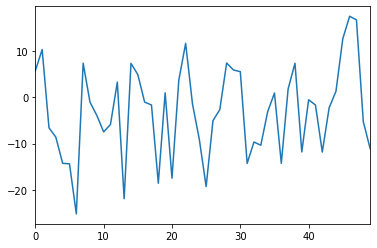

In [29]:
x = np.random.normal(0, 10,size=50)
pd.Series(x).plot()

In [26]:
#window size
N = 3

<AxesSubplot:title={'center':'Simple Moving avergae with window size 3'}>

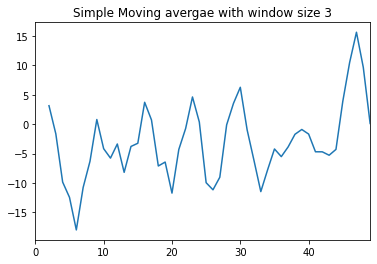

In [32]:
ma = pd.Series(x).rolling(N).mean()
ma.plot(title="Simple Moving avergae with window size %s" % N)

In der Funktionalanalysis, einem Teilbereich der Mathematik, beschreibt die Faltung, auch Konvolution (von lateinisch convolvere ,zusammenrollen"), einen mathematischen Operator, der für zwei Funktionen $f$ und $g$ eine dritte Funktion $f * g$ liefert.
Anschaulich bedeutet die Faltung $f * g$, dass jeder Wert von $f$ durch das mit $g$ gewichtete Mittel der ihn umgebenden Werte ersetzt wird. Genauer wird für den Mittelwert $(f * g)(x)$ der Funktionswert $f(\tau)$ mit $g(x-\tau)$ gewichtet. Die resultierende, Überlagerung" zwischen $f$ und gespiegelten und verschobenen Versionen von $g$ (man spricht auch von einer "Verschmierung" von $f$ ) kann z. B. verwendet werden, um einen gleitenden Durchschnitt zu bilden.
Die Kreuzkorrelations-Operation ist identisch mit der komplex konjugierten Faltung $\overline{f(-\tau)}$ (s. hier). Insbesondere im Fachgebiet Maschinelles Lernen, wo man mit Convolutional Neural Networks arbeitet, wird aufgrund dieser Identität meistens die Kreuzkorrelation verwendet, diese aber als Faltung bezeichnet, weil sie leichter zu implementieren ist. $^{[1]}$

The moving average with window size $N$ is equivalent to convolving the series $x$ with the series $[ \frac{1}{N}, \frac{1}{N}, \frac{1}{N} ]$.

$MA_{N}(x) = x * [ \frac{1}{N}, \frac{1}{N}, \frac{1}{N} ]$

$MA_{N}(x) = x * \{ 1 \text{for} i \in \{1,2,3,...,N\} \} / N$

- Input signal :=: $x = [x_0, x_1, ..., x_{m}]$
- Kernel := $v = [w_0, w_1, ..., w_{N}]$
- Output := $y = [y_0, y_1, ..., y_{m}]$

- For every point $x_t \in x$ on which the kernel is slided, $x_t = x_0$ is the center.
- So we can make it more clear : $v = [w_{-p}, w_{-p+1},..., w_{0},...,w_{p-1}, w_{p}]$
- kernel length should be odd so that $x_t$ can be in the center
- We also add an activation function on the weighted sum


- $y_t = \sum_{k=-p}^{p} x_{t-k}w_{k}$

- stride =: "skip", default conv has stride=1, meaning kernel is applied at every $x_t$.
- Stride = 2 means only applying the kernel to every other data point $x_0, x_2, x_4,...$.
- If the sampling frequency is very higher (e.g. every 1 nanosecond), you can savely use a higher stride to safe computation
- stride can be used (next to pooling) to reduce resolution along the layers.

<AxesSubplot:>

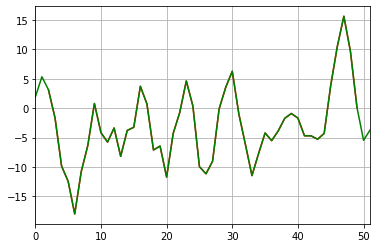

In [40]:
N = 3
v = np.ones(N)/N
conv = np.convolve(x, v)

ax=pd.Series(x).rolling(N).mean().plot(c="red")
pd.Series(conv).plot(ax=ax,c="green",grid=True)

In [41]:
v

array([0.33333333, 0.33333333, 0.33333333])

<AxesSubplot:>

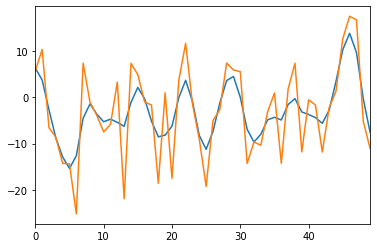

In [63]:
# Gaussian Kernel
ax = pd.Series(gaussian_filter1d(x, 1)).plot()
pd.Series(x).plot(ax=ax)

In [67]:
def gaussian( x , s):
    return 1./np.sqrt( 2. * np.pi * s**2 ) * np.exp( -x**2 / ( 2. * s**2 ) )
v = np.array([gaussian(_, 1) for _ in range( -3, 4, 1 )])
conv = np.convolve(x, v, mode="same")

<AxesSubplot:>

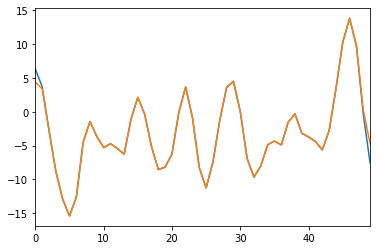

In [68]:
# (Self buuilt) Gaussian Kernel
ax = pd.Series(gaussian_filter1d(x, 1)).plot()
pd.Series(conv).plot(ax=ax)

Watch completely ! Very good , also the practical part
https://end-to-end-machine-learning.teachable.com/courses/321-convolutional-neural-networks/lectures/14556553